In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

from feature_engineering import transformation
# plt.style.use('seaborn-colorblind')
# %matplotlib inline
#from feature_cleaning import rare_values as ra

## Load Dataset

In [2]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./data/titanic.csv', usecols=use_cols)


In [3]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


In [4]:
# Note that we include target variable in the X_train 
# because we need it to supervise our discretization
# this is not the standard way of using train-test-split
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

## Logarithmic transformation

## Transformación Logarítmica en Machine Learning

### ¿Qué es?

La **transformación logarítmica** es una técnica usada para **reducir la asimetría (skewness)** de una variable numérica, especialmente cuando sus valores tienen una **distribución sesgada a la derecha** (muchos valores pequeños y pocos valores muy grandes).

En Machine Learning, esto ayuda a que los modelos aprendan mejor al trabajar con distribuciones más normales y escalas más equilibradas.

In [17]:
import pandas as pd

dataframe_a = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})

# Asignación directa (NO es una copia)
dataframe_b = dataframe_a

# Eliminamos una columna en dataframe_b
dataframe_b.drop(columns=['col2'], inplace=True)

print("dataframe_a:")
print(dataframe_a)


dataframe_a:
   col1
0     1
1     2
2     3


Variable Fare Q-Q plot


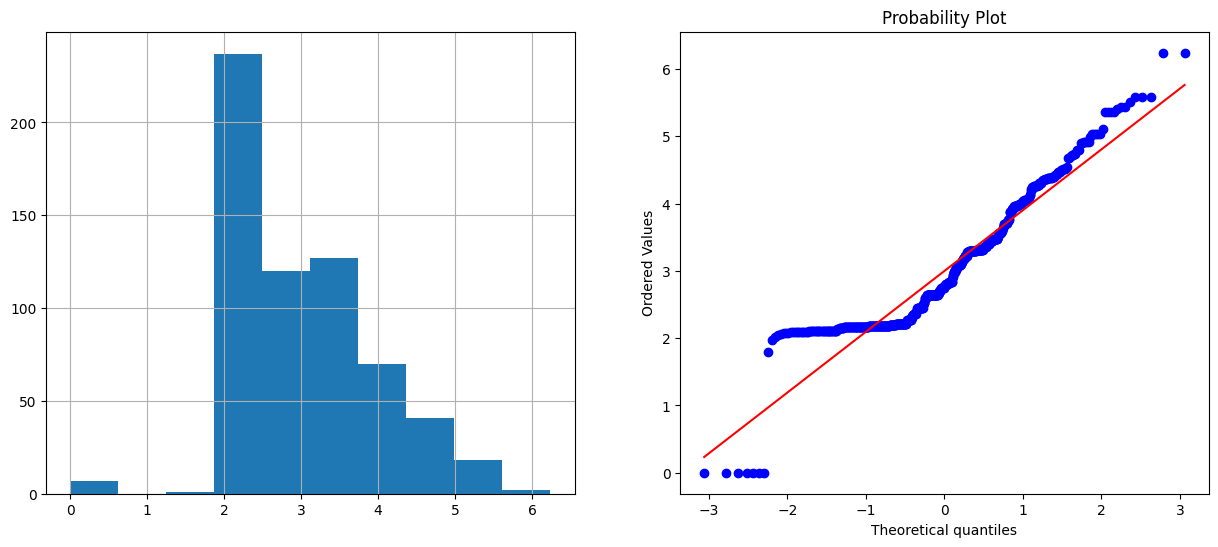

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_log
857         1       1    male  51.0      0  26.5500  3.316003
52          1       1  female  49.0      1  76.7292  4.353231
386         0       3    male   1.0      5  46.9000  3.869116
124         0       1    male  54.0      0  77.2875  4.360388
578         0       3  female   NaN      1  14.4583  2.738146
549         1       2    male   8.0      1  36.7500  3.630985


In [18]:
# add the new created feature
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.log_transform(data=X_train,cols=['Fare'])
print(X_train_copy.head(6))

## Reciprocal transformation

## Transformación Recíproca en Machine Learning

### ¿Qué es?

La **transformación recíproca** consiste en convertir una variable `x` en su inversa matemática:  
 `1/x`

Se utiliza principalmente para:

- Reducir **asimetría positiva** (distribuciones sesgadas a la derecha).
- Suavizar el efecto de valores muy grandes.
- Transformar relaciones no lineales en algo más lineal para ciertos modelos.

Variable Fare Q-Q plot


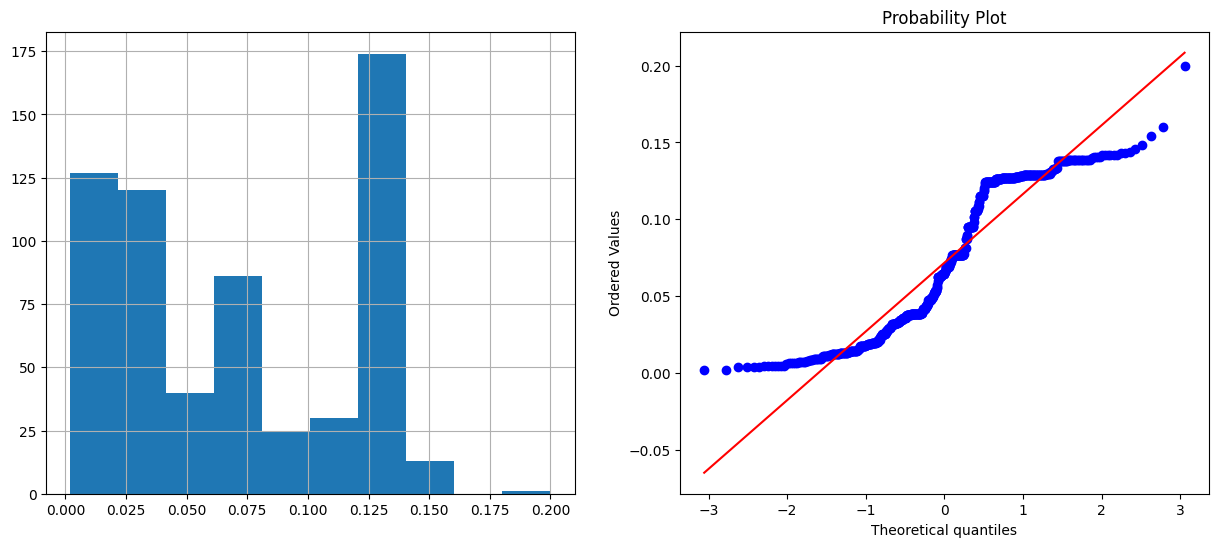

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_reciprocal
857         1       1    male  51.0      0  26.5500         0.037665
52          1       1  female  49.0      1  76.7292         0.013033
386         0       3    male   1.0      5  46.9000         0.021322
124         0       1    male  54.0      0  77.2875         0.012939
578         0       3  female   NaN      1  14.4583         0.069164
549         1       2    male   8.0      1  36.7500         0.027211


In [19]:
# add the new created feature
X_train_copy = X_train.copy(deep=True)
X_train_copy = X_train_copy[X_train_copy.Fare!=0] # Warning that x should not be 0
#X_train_copy[X_train_copy.Fare==0]
X_train_copy = transformation.reciprocal_transform(data=X_train_copy,cols=['Fare'])
print(X_train_copy.head(6))

## Square root transformation

##  Transformación Raíz Cuadrada en Machine Learning

### ¿Qué es?

La **transformación raíz cuadrada** consiste en aplicar la función `sqrt(x)` a una variable numérica.  
Su propósito principal es **reducir la asimetría (skewness)** de una variable cuando sus valores tienden a ser muy altos.


Variable Fare Q-Q plot


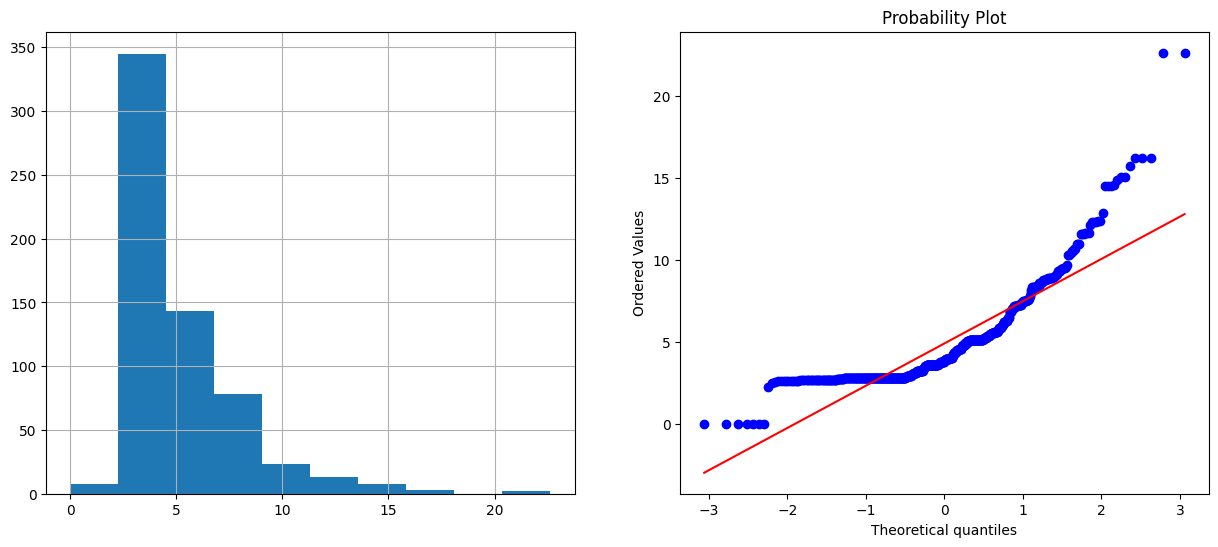

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_square_root
857         1       1    male  51.0      0  26.5500          5.152669
52          1       1  female  49.0      1  76.7292          8.759521
386         0       3    male   1.0      5  46.9000          6.848357
124         0       1    male  54.0      0  77.2875          8.791331
578         0       3  female   NaN      1  14.4583          3.802407
549         1       2    male   8.0      1  36.7500          6.062178


In [7]:
# add the new created feature
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.square_root_transform(data=X_train,cols=['Fare'])
print(X_train_copy.head(6))

## Exponential transformation

## Transformación Exponencial en Machine Learning

### ¿Qué es?

La **transformación exponencial** consiste en aplicar una función de la forma:

x' = exp(coef * x)

Esta transformación **expande los valores** a medida que aumentan, y es el **inverso de la transformación logarítmica**.

Variable Fare Q-Q plot


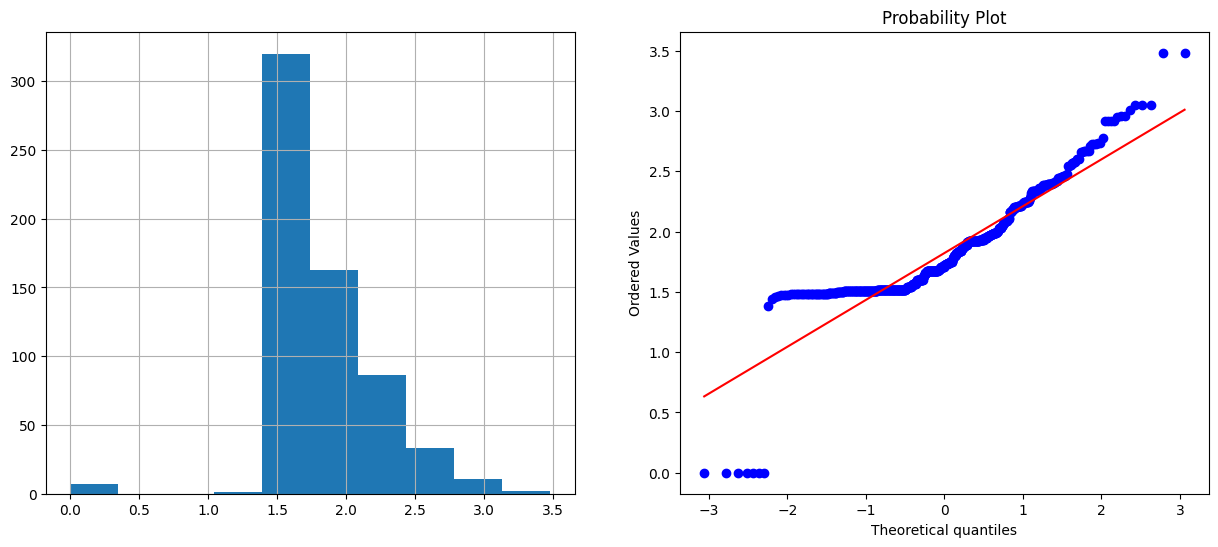

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_exp
857         1       1    male  51.0      0  26.5500  1.926695
52          1       1  female  49.0      1  76.7292  2.382276
386         0       3    male   1.0      5  46.9000  2.158910
124         0       1    male  54.0      0  77.2875  2.385733
578         0       3  female   NaN      1  14.4583  1.706174
549         1       2    male   8.0      1  36.7500  2.056134


In [8]:
# add the new created feature
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.exp_transform(data=X_train,cols=['Fare'],coef=0.2)
print(X_train_copy.head(6))

## Box-cox transformation

## ¿Qué es la transformación de Box-Cox?

Box-Cox es una **transformación paramétrica** que convierte una variable **no normal** en una que se asemeje más a una **distribución normal**, mejorando así el rendimiento de muchos algoritmos de *machine learning*.

 **Importante:** Solo se puede aplicar a datos **positivos** y **no nulos**.

Lo que hace es probar diferentes formas de “apretar” o “estirar” los datos (como **logaritmo**, **raíz cuadrada**, etc.)… y elige automáticamente **la que mejor funcione** para hacerlos “más normales”.


In [9]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_boxcox'] = pt.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_boxcox
857         1       1    male  51.0      0  26.5500     0.398696
52          1       1  female  49.0      1  76.7292     1.401774
386         0       3    male   1.0      5  46.9000     0.950718
124         0       1    male  54.0      0  77.2875     1.408228
578         0       3  female   NaN      1  14.4583    -0.222897
549         1       2    male   8.0      1  36.7500     0.718007


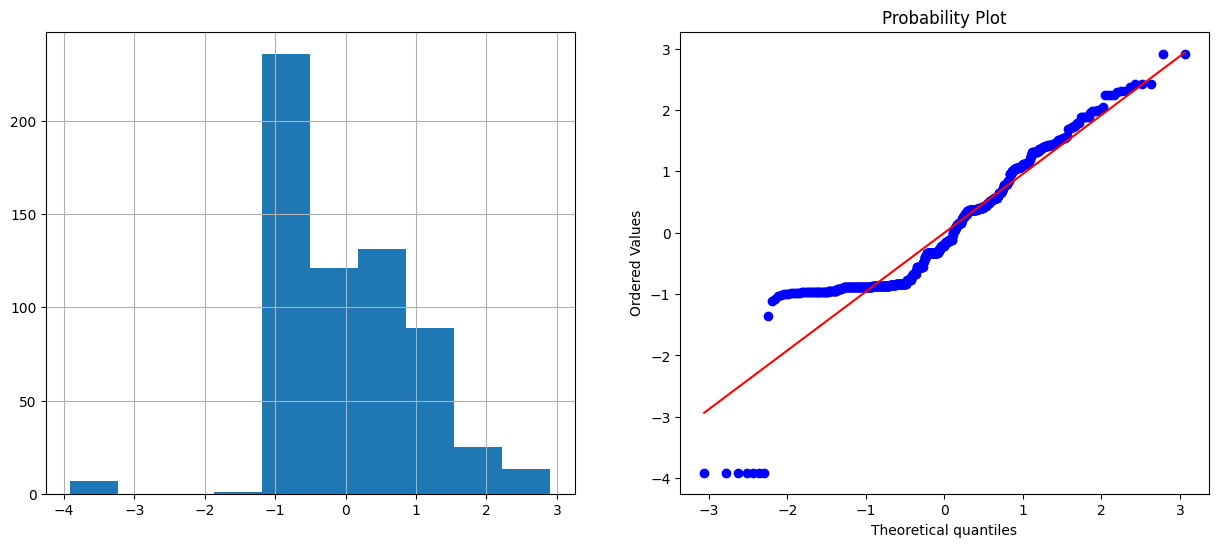

In [10]:
transformation.diagnostic_plots(X_train_copy,'Fare_boxcox')

## Quantile transformation

## Transformación Cuantílica con QuantileTransformer

### ¿Qué hace?

Aplica una **transformación cuantílica** (`QuantileTransformer`) a la columna `Fare` para que sus valores se distribuyan como una **distribución normal estándar** (media 0, varianza 1).

### ¿Cómo funciona?

El `QuantileTransformer`:

- Ordena todos los valores de la variable.
- Los reemplaza por los cuantiles equivalentes de una distribución normal.
- Así, transforma cualquier distribución original (sesgada, con outliers, etc.) en una distribución más **simétrica y normal**.

### ¿Por qué es útil?

- Mejora el rendimiento de modelos que **asumen normalidad** en los datos (por ejemplo, regresión lineal, LDA, PCA).
- **Reduce el impacto de outliers**, al distribuir los valores de forma más homogénea.

### Resultado

Sin importar cómo eran tus datos originales, el resultado final **simula una curva en forma de campana**, lo cual es beneficioso para muchos algoritmos de machine learning.


In [11]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal').fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_qt'] = qt.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp     Fare   Fare_qt
857         1       1    male  51.0      0  26.5500  0.470128
52          1       1  female  49.0      1  76.7292  1.269732
386         0       3    male   1.0      5  46.9000  0.841047
124         0       1    male  54.0      0  77.2875  1.287991
578         0       3  female   NaN      1  14.4583 -0.022167
549         1       2    male   8.0      1  36.7500  0.744471


C:\virtual_environment\bootcamp03\lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (623). n_quantiles is set to n_samples.
  warnings.warn(


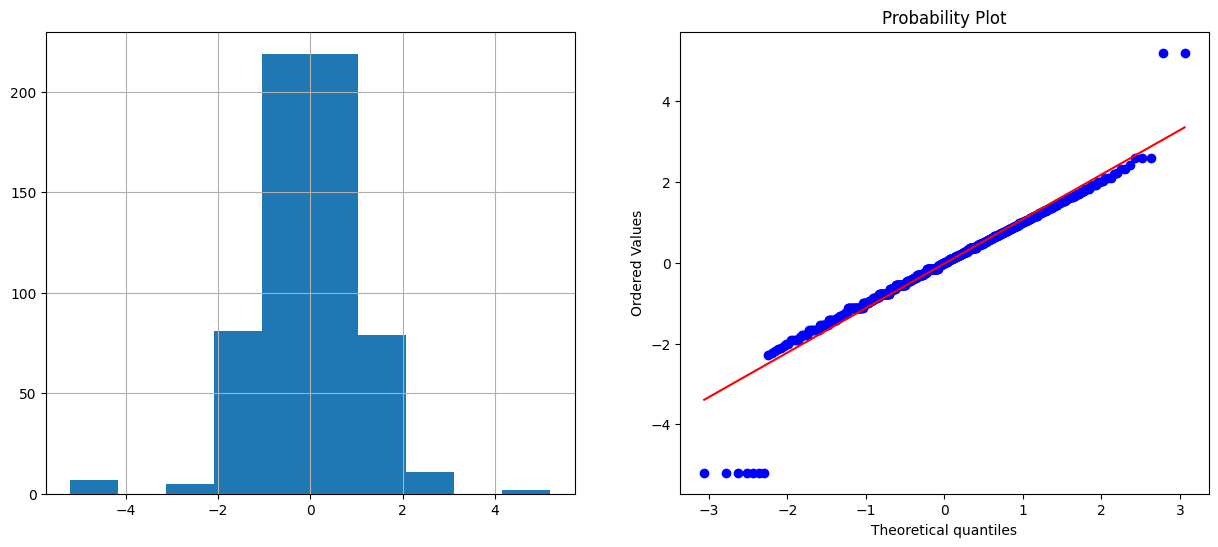

In [12]:
transformation.diagnostic_plots(X_train_copy,'Fare_qt')

## Cuadro resumen de transformaciones numéricas

| Transformación             | ¿Cuándo usarla?                                                                 | Requiere datos positivos | Sensible a outliers | Resultado típico              |
|---------------------------|----------------------------------------------------------------------------------|---------------------------|---------------------|-------------------------------|
| `log_transform`           | Cuando los datos están **sesgados a la derecha** o tienen una **cola larga**.   | ✅ Sí                     | ⚠️ Sí               | Reduce sesgo, achata colas.   |
| `square_root_transform`   | Similar al log, útil para **conteos pequeños** o **datos moderadamente sesgados**. | ✅ Sí                     | ⚠️ Sí               | Suaviza ligeramente.          |
| `reciprocal_transform`    | Para **valores grandes dominantes**; reduce la magnitud de grandes valores.     | ✅ Sí                     | ⚠️ Sí               | Inversa, reduce varianza.     |
| `exp_transform`           | Cuando necesitas **expandir diferencias pequeñas** (raro, pero útil en scoring).| ✅ Sí                     | ⚠️ Sí               | Estira valores bajos.         |
| `boxcox`                  | Para **hacer la distribución lo más normal posible**, se ajusta automáticamente.| ✅ Sí                     | ⚠️ Sí               | Aproxima normalidad.          |
| `quantile_transform (normal)` | Para **forzar una distribución normal estándar**, sin importar la original.     | ✅ Sí (o escalar antes)   | ❌ No               | Simula una curva normal.      |
| `standard_scaler`         | Para **centrar** y **escalar** datos (media 0, varianza 1), no cambia forma.     | ❌ No necesario           | ⚠️ Sí               | Misma forma, diferente escala.|
| `minmax_scaler`           | Para llevar los datos a un **rango fijo**, como [0, 1].                           | ❌ No necesario           | ⚠️ Sí               | Misma forma, nuevo rango.     |
| `KBinsDiscretizer (uniform)` | Cuando deseas **agrupar valores en intervalos de igual ancho**.               | ❌ No necesario           | ⚠️ Sí               | Convierte en categorías.      |
| `KBinsDiscretizer (quantile)`| Cuando deseas **bins con igual número de muestras**.                          | ❌ No necesario           | ❌ No               | Categorías balanceadas.       |
| `KBinsDiscretizer (kmeans)`  | Para **agrupar con base en similitud** entre valores.                         | ❌ No necesario           | ⚠️ Sí               | Agrupamiento adaptativo.      |
| `DiscretizeByDecisionTree`   | Cuando quieres discretizar **usando información supervisada (target)**.        | ❌ No necesario           | ⚠️ Sí               | Bins según puntos de corte.   |
| `ChiMerge`                  | Ideal para **discretizar con base en la relación con la variable objetivo**.   | ❌ No necesario           | ⚠️ Sí               | Usa pruebas estadísticas.     |
| `TargetEncoder`            | Para variables categóricas, **usa la media del target** por categoría.          | N/A                      | ⚠️ Sí               | Riesgo de leakage.            |
| `WOEEncoder`               | Similar al anterior, pero **optimizado para modelos lineales y credit scoring**.| N/A                      | ⚠️ Sí               | Información ponderada.        |

